In [85]:
import numpy as np


In [86]:
def sigma(x: np.array,w: np.array)-> float:
    sig = 1/(1+ np.exp(-(np.sum(x*w))))
    return sig
def bincrosentropy(p:float,y:int)->float:
    H = -(y*np.log(p)+(1-y)*np.log(1-p))
    return H
def grad(x: np.array,w: np.array,wn: int)-> float:
    dist = 0.000001
    dw = np.copy(w)
    dw[wn] = dw[wn] + dist
    
    grad_wn = (bincrosentropy(sigma(x,dw),1) - bincrosentropy(sigma(x,w),1))/dist
    return grad_wn
x = np.array([1,1,2])
w = np.array([0.,2.,-1.])
dw = np.array([0.,2.,-1.])
# sigma(x,w)


print(grad(x,w,0),grad(x,w,1),grad(x,w,2),grad(x,w,0)*grad(x,w,1)*grad(x,w,2))

-0.4999998750587764 -0.4999998750587764 -0.9999995000953277 -0.24999975008268638


In [87]:
import numpy as np
def sigma(x: np.array,w: np.array)-> float:
    x = np.hstack((x,np.array(1)))
    sig = 1/(1+ np.exp(-(np.sum(x*w))))
    return sig

np.random.seed(42)
# Функция подсчета градиента
def gradient(y_true: int, y_pred: float, x: np.array) -> np.array:
    x = np.hstack((x,np.array(1)))
    """
    y_true - истинное значение ответа для объекта x
    y_pred - значение степени принадлежности объекта x классу 1, предсказанное нашей моделью
    x - вектор признакового описания данного объекта

    На выходе ожидается получить вектор частных производных H по параметрам модели, предсказавшей значение y_pred
    Обратите внимание, что размерность этого градиента должна получиться на единицу больше размерности x засчет своободного коэффициента a0
    """
    grad = x*((1-y_true)*y_pred - y_true*(1-y_pred))
    return grad


# Функция обновления весов
def update(alpha: np.array, gradient: np.array, lr: float):
    """
    alpha: текущее приближения вектора параметров модели
    gradient: посчитанный градиент по параметрам модели
    lr: learning rate, множитель перед градиентом в формуле обновления параметров
    """
    alpha_new = alpha - lr*gradient
    return alpha_new


# функция тренировки модели
def train(
    alpha0: np.array, x_train: np.array, y_train: np.array, lr: float, num_epoch: int
):
    """
    alpha0 - начальное приближение параметров модели
    x_train - матрица объект-признак обучающей выборки
    y_train - верные ответы для обучающей выборки
    lr - learning rate, множитель перед градиентом в формуле обновления параметров
    num_epoch - количество эпох обучения, то есть полных 'проходов' через весь датасет
    """
    y_pred = []
    alpha = alpha0.copy()
    for epo in range(num_epoch):
        for i, x in enumerate(x_train):
            y_pred = sigma(x,alpha)
            alpha = update(alpha,gradient(y_train[i],y_pred,x),lr)
            
    return alpha

[ 4.72760729 -0.10740569 -0.34561448]


(-2.0, 2.0)

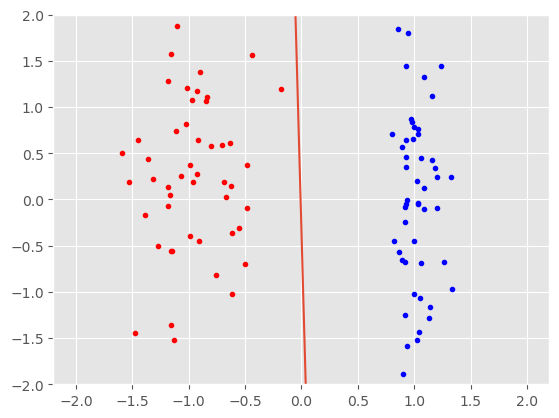

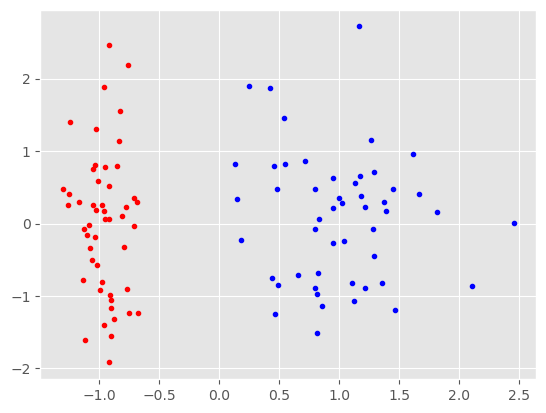

In [88]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
separable = False
while not separable:
    samples = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
    red = samples[0][samples[1] == 0]
    blue = samples[0][samples[1] == 1]
    separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')

plt.show()
## Создаем линейно разделимую выборку

[5.03767312 0.28670515 0.27989429]


(-2.0, 2.0)

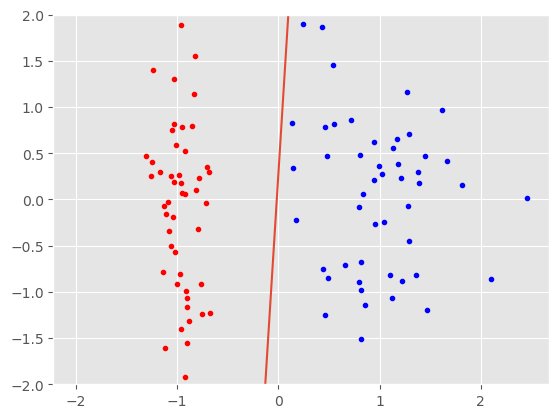

In [89]:
alpha0 = np.array([1]*3)
koef = train(alpha0,samples[0],samples[1],1,1)
print(koef)
y = koef[0]*np.linspace(-2,2,50)/koef[1] + koef[2]
plt.style.use('ggplot')
red = samples[0][samples[1] == 0]
blue = samples[0][samples[1] == 1]
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.plot(np.linspace(-2,2,50),y)
plt.ylim(-2,2)
## Строим линию по найденым коэффициентам. Должна получится разделяющая гиперплоскость